<a href="https://colab.research.google.com/github/kalyanvv/BTP_Project/blob/main/BTP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content'

In [ ]:
mkdir offsig

In [ ]:
ls

offsig/  sample_data/


In [ ]:
cd ..

/


In [ ]:
cd root

/root


In [ ]:
mkdir .kaggle

In [ ]:
cd .kaggle

/root/.kaggle


In [ ]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
cd ..

/root


In [ ]:
cd ..

/


In [ ]:
cd content/offsig/

/content/offsig


In [ ]:
!kaggle datasets download -d sinjinir1999/utsignature-verification

 95% 236M/249M [00:03<00:00, 92.3MB/s]
100% 249M/249M [00:03<00:00, 68.6MB/s]


In [ ]:
!unzip utsignature-verification.zip

Streaming output truncated to the last 5000 lines.
  inflating: UTSig/Forgery/Simple/69/42.tif  
  inflating: UTSig/Forgery/Simple/69/43.tif  
  inflating: UTSig/Forgery/Simple/69/44.tif  
  inflating: UTSig/Forgery/Simple/69/45.tif  
  inflating: UTSig/Forgery/Simple/69/46.tif  
  inflating: UTSig/Forgery/Simple/69/51.tif  
  inflating: UTSig/Forgery/Simple/69/52.tif  
  inflating: UTSig/Forgery/Simple/69/53.tif  
  inflating: UTSig/Forgery/Simple/69/54.tif  
  inflating: UTSig/Forgery/Simple/69/55.tif  
  inflating: UTSig/Forgery/Simple/69/56.tif  
  inflating: UTSig/Forgery/Simple/69/61.tif  
  inflating: UTSig/Forgery/Simple/69/62.tif  
  inflating: UTSig/Forgery/Simple/69/63.tif  
  inflating: UTSig/Forgery/Simple/69/64.tif  
  inflating: UTSig/Forgery/Simple/69/65.tif  
  inflating: UTSig/Forgery/Simple/69/66.tif  
  inflating: UTSig/Forgery/Simple/7/11.tif  
  inflating: UTSig/Forgery/Simple/7/12.tif  
  inflating: UTSig/Forgery/Simple/7/13.tif  
  inflating: UTSig/Forgery/Simpl

In [ ]:
!pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9470 sha256=5869549cdb0fd9fcffa2d4b2638fdcd88efcdd7bc08397e959384b8a53184afc
  Stored in directory: /root/.cache/pip/wheels/aa/0a/0f/0775c812151040fb695c0890d902810a9d69e1db50181e5328
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320515 sha256=a8230631c289b4b9651d9a2b8008be8304a0706a3d9b5805ebba6232f6a68188
  Stored in directory: /root/.cache/pip/wheels/d2/50/d6/95e7c7713c3c1609e30a394d7431ffc11e4f7deb82d13ffceb
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

In [ ]:
# General
import gc, os
import numpy as np
from tqdm.notebook import tqdm, trange

# Machine Learning
import tensorflow as tf
from keras import Model
from keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

# Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from plot_keras_history import plot_history

# Metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
dataset_path = '/content/offsig/UTSig/'

In [ ]:
# Number of genuine signatures per class (person)
G_num = 27
# Number of forgeries signatures per class (person)
# F_num = 45
# Number of classes (persons)
c_num = 115

In [ ]:
os.mkdir(dataset_path + 'genuine')
os.mkdir(dataset_path + 'genuine/train')
os.mkdir(dataset_path + 'genuine/test')
os.mkdir(dataset_path + 'genuine/lime')
dataset_gen_path = dataset_path + 'genuine/'

In [ ]:
for c in trange(c_num):

  class_id = c + 1
  # class_id_str = str(class_id).zfill(len(str(c_num)))

  # Make a subdirectory for this class
  train_subdirectory = dataset_gen_path + '/train/class_' + str(c)
  os.mkdir(train_subdirectory)
  test_subdirectory = dataset_gen_path + '/test/class_' + str(c)
  os.mkdir(test_subdirectory)
  lime_subdirectory = dataset_gen_path + '/lime/class_' + str(c)
  os.mkdir(lime_subdirectory)

  # For each genuine
  for g in range(G_num):
    genuine_id = g + 1
    # genuine_id_str = str(genuine_id).zfill(len(str(G_num)))
    file_name = 'Genuine/' + str(class_id) + '/' + str(genuine_id) + '.tif'
    file_path = dataset_path + file_name
    if g < 22:
      dest_path = train_subdirectory + '/' + str(c) + '_image_' + str(g) + '.tif'
      os.replace(file_path, dest_path)
    else:
      dest_path = test_subdirectory + '/' + str(c) + '_image_' + str(g) + '.tif'
      os.replace(file_path, dest_path)

  0%|          | 0/115 [00:00<?, ?it/s]

In [ ]:
import shutil

lime_subdirectory = dataset_gen_path + '/lime/class_' + str(0)
file_name = 'genuine/test/class_0/0_image_22' + '.tif'
file_path = dataset_path + file_name
dest_path = lime_subdirectory + '/' + str(0) + '_image_' + str(22) + '.tif'
# os.replace(file_path, dest_path)
shutil.copyfile(file_path,dest_path)

'/content/offsig/UTSig/genuine//lime/class_0/0_image_22.tif'

In [ ]:
lime_subdirectory = dataset_gen_path + '/lime/class_' + str(1)
file_name = 'genuine/test/class_1/1_image_22' + '.tif'
file_path = dataset_path + file_name
dest_path = lime_subdirectory + '/' + str(1) + '_image_' + str(22) + '.tif'
# os.replace(file_path, dest_path)
shutil.copyfile(file_path,dest_path)

'/content/offsig/UTSig/genuine//lime/class_1/1_image_22.tif'

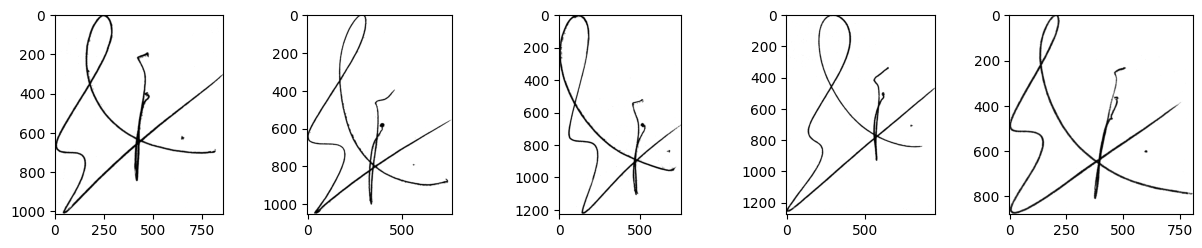

In [ ]:
plt.figure(figsize=(15,15)) # specifying the overall grid size

for i in range(5):
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    img = mpimg.imread('/content/offsig/UTSig/genuine/train/class_0/0_image_'+ str(i) +'.tif')
    plt.imshow(img, cmap='gray')

plt.show()

In [ ]:
src_path_train = dataset_gen_path + '/train/'
src_path_test = dataset_gen_path + '/test/'
src_path_lime = dataset_gen_path + '/lime/'

train_datagen = ImageDataGenerator(
        rescale = 1 / 255.0,
        rotation_range=  20,
        zoom_range = 0.05,
        width_shift_range = 0.05,
        height_shift_range = 0.05,
        shear_range = 0.05,
        horizontal_flip = True,
        fill_mode = "nearest",
        validation_split = 0.20)

test_datagen = ImageDataGenerator(rescale = 1 / 255.0)
lime_datagen = ImageDataGenerator(rescale = 1 / 255.0)

In [ ]:
lime_datagen = ImageDataGenerator(rescale = 1 / 255.0)

In [ ]:
batch_size = 16
target_size = (299, 299)
train_generator = train_datagen.flow_from_directory(
    directory = src_path_train,
    target_size = target_size,
    color_mode = "rgb",
    batch_size = batch_size,
    class_mode = "categorical",
    subset = 'training',
    shuffle = True
)
valid_generator = train_datagen.flow_from_directory(
    directory = src_path_train,
    target_size = target_size,
    color_mode = "rgb",
    batch_size = batch_size,
    class_mode = "categorical",
    subset = 'validation',
    shuffle = True
)
test_generator = test_datagen.flow_from_directory(
    directory = src_path_test,
    target_size = target_size,
    color_mode = "rgb",
    batch_size = 1,
    class_mode = None,
    shuffle = False
)
lime_generator = lime_datagen.flow_from_directory(
    directory = src_path_lime,
    target_size = target_size,
    color_mode = "rgb",
    batch_size = 1,
    class_mode = None,
    shuffle = False
)

Found 2070 images belonging to 115 classes.
Found 460 images belonging to 115 classes.
Found 575 images belonging to 115 classes.
Found 1 images belonging to 115 classes.


In [ ]:
lime_generator = lime_datagen.flow_from_directory(
    directory = src_path_lime,
    target_size = target_size,
    color_mode = "rgb",
    batch_size = 1,
    class_mode = None,
    shuffle = False
)

Found 2 images belonging to 115 classes.


In [ ]:
test_true_labels = test_generator.classes

In [ ]:
gc.collect()

14323

In [ ]:
# Loading Inception-V3 model
model = InceptionV3(include_top=False, weights='imagenet', input_shape=(299, 299, 3))

# Freeze layers
for layer in model.layers:
	layer.trainable = False

# Add our classifier to the end of the model
flat1 = GlobalAveragePooling2D()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
dropout1 = Dropout(0.1)(class1)
output = Dense(c_num, activation='softmax')(dropout1)

model = Model(inputs=model.inputs, outputs=output)

model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                  

In [ ]:
# As the problem have multi-class we should use categorical_crossentropy loss function
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

In [ ]:
model_hist = model.fit(train_generator,
                       steps_per_epoch = STEP_SIZE_TRAIN,
                       validation_data = valid_generator,
                       validation_steps = STEP_SIZE_VALID,
                       epochs=10)

Epoch 1/10
129/129 [==============================] - 103s 655ms/step - loss: 3.6846 - accuracy: 0.2069 - val_loss: 2.2087 - val_accuracy: 0.5156
Epoch 2/10
129/129 [==============================] - 67s 519ms/step - loss: 1.5188 - accuracy: 0.6144 - val_loss: 1.2382 - val_accuracy: 0.7054
Epoch 3/10
129/129 [==============================] - 73s 566ms/step - loss: 0.8189 - accuracy: 0.7980 - val_loss: 0.7982 - val_accuracy: 0.7768
Epoch 4/10
129/129 [==============================] - 70s 540ms/step - loss: 0.5504 - accuracy: 0.8632 - val_loss: 0.6470 - val_accuracy: 0.8036
Epoch 5/10
129/129 [==============================] - 69s 537ms/step - loss: 0.4141 - accuracy: 0.8909 - val_loss: 0.6197 - val_accuracy: 0.8170
Epoch 6/10
129/129 [==============================] - 69s 533ms/step - loss: 0.3326 - accuracy: 0.9104 - val_loss: 0.5056 - val_accuracy: 0.8549
Epoch 7/10
129/129 [==============================] - 59s 460ms/step - loss: 0.2774 - accuracy: 0.9270 - val_loss: 0.4476 - val_a

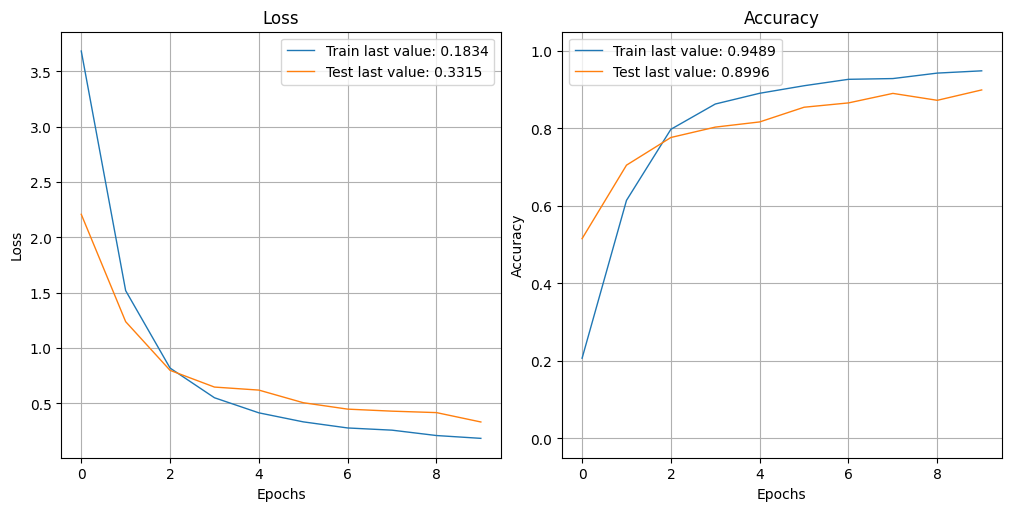

In [ ]:
plot_history(model_hist.history)
plt.show()
plt.close()

In [ ]:
score = model.evaluate(valid_generator)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

29/29 [==============================] - 13s 432ms/step - loss: 0.3529 - accuracy: 0.9043
Validation loss: 0.35292601585388184
Validation accuracy: 0.904347836971283


In [ ]:
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
# Test generator should be reset at each run
test_generator.reset()
# Prediction for test data
pred = model.predict(test_generator, steps=STEP_SIZE_TEST, verbose=1)

575/575 [==============================] - 9s 12ms/step


In [ ]:
# Find the class with higher score for each data
predicted_class_indices = np.argmax(pred, axis=1)

In [ ]:
# Calculating the accuracy and f1-score
acc = accuracy_score(test_true_labels, predicted_class_indices)
f1 = f1_score(test_true_labels, predicted_class_indices, average='weighted')
print('Test results:', 'accuracy=', acc, ', Weighted F1-score=', f1)

Test results: accuracy= 0.9234782608695652 , Weighted F1-score= 0.9238358742706569


In [ ]:
from collections import Counter
true_count = Counter(test_true_labels)
pred_count = Counter(predicted_class_indices)

In [ ]:
import plotly.graph_objects as go

import numpy as np

fig = go.Figure()
fig.add_trace(go.Bar(
    x = list(true_count.keys()),
    y = list(true_count.values()),
    name = 'True', # name used in legend and hover labels
    marker_color = '#3498EB',
    opacity = 0.3
))
fig.add_trace(go.Bar(
    x = list(pred_count.keys()),
    y = list(pred_count.values()),
    name = 'Predicted', # name used in legend and hover labels
    marker_color = '#EB4034',
    opacity = 0.8
))

fig.update_layout(
    title_text='Comparing the prediction and true classes', # title of plot
    xaxis_title_text='Class', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.1, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

In [ ]:
threshold = 0.40
new_pred_classes = []

for index, pr in enumerate(pred):
  if max(pr) < threshold:
    new_pred_classes.append(115)
  else:
    new_pred_classes.append(predicted_class_indices[index])

new_pred_classes = np.array(new_pred_classes)

In [ ]:
print(new_pred_classes)

[  0   0   0   0   0   1   1   1   1   1   2   2  11   2   2   3   3   3
   3   3   8   4   4   4   4   5   5   5   5   5   6   6   6   6   6   7
   7   7   7   7   8   8   8   8   8   9   9   9   9   6  10  10  10  10
  10  11  11  11  11  11  12  12  12  12  12  90  13  13  13  13  14  14
  14 115 115  15  15  15  15  15  16  16  16  16  16  17  17  17  17  17
  18  18  18  18  18  19  19  19  19  19  20  20  60  20  20  21  21  53
  21  21  22  22  22  22  22  23  23  23  23  23  24  24  24  24  24  25
  25  25  25  25  26  26  26  26  26  27  27  27  27  27  28  28  28  28
  28  29  29  29  29  29  49 115  31  30  30  31  31  31  31  31 115  32
  32  32  32  33  33  33  33  33  34  34  34  19  34  35  35  35 115  35
  36 115  36  36 115  37  37  37  37  37  38  38  38  38  38  39  39  39
  39  39  40  40  40  40  40  91  41  41  41  41  86  42  42  42  42  43
  88  43  43  43  44  44  44  44  44  45  45  45  45  45  46  46  46  46
  46  47  47  47  47  47  48  48  48  48  48  49  4

In [ ]:
new_acc = accuracy_score(test_true_labels, new_pred_classes)
new_f1 = f1_score(test_true_labels, new_pred_classes, average='weighted')
print('Test results:', 'accuracy=', new_acc, ', Weighted F1-score=', new_f1)

Test results: accuracy= 0.9113043478260869 , Weighted F1-score= 0.9226786739830217


In [ ]:
STEP_SIZE_LIME = lime_generator.n//lime_generator.batch_size
# Test generator should be reset at each run
lime_generator.reset()
# Prediction for test data
pred_lime = model.predict(lime_generator, steps=STEP_SIZE_LIME, verbose=1)

2/2 [==============================] - 0s 17ms/step


In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

In [ ]:
from skimage.segmentation import mark_boundaries

In [ ]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

STEP_SIZE_LIME = lime_generator.n//lime_generator.batch_size
# Test generator should be reset at each run
lime_generator.reset()
# Prediction for test data
pred_lime = model.predict(lime_generator, steps=STEP_SIZE_LIME, verbose=1)



2/2 [==============================] - 0s 17ms/step


In [ ]:
print(pred_lime)

[[9.99617934e-01 2.45962556e-10 4.88359603e-07 5.23875920e-09
  3.56033605e-11 1.27195462e-10 3.69268236e-07 8.60463899e-07
  9.27151067e-09 2.85284294e-08 8.24365731e-09 5.09587004e-08
  2.24360708e-09 7.65002195e-09 5.04146941e-12 3.71306319e-10
  3.11189852e-10 6.66587896e-09 2.05995637e-10 2.68210485e-08
  1.29632194e-10 1.27971364e-12 9.37898079e-08 8.51727456e-12
  1.25564181e-08 2.24702382e-10 7.00442621e-11 1.17770389e-06
  4.71409543e-12 7.62566066e-10 7.68963048e-07 6.13876665e-08
  2.99440543e-08 1.27647395e-08 2.86015734e-06 2.33234402e-07
  8.48531698e-08 4.42830839e-07 1.38529743e-09 1.42042351e-08
  1.52742445e-12 1.27497026e-08 1.19542314e-08 1.45974207e-06
  5.70702730e-12 2.61273067e-06 3.53820511e-08 4.40563275e-09
  2.13948148e-09 1.56035458e-04 7.17758481e-13 8.40401290e-11
  7.03417768e-10 2.58926100e-13 1.90363814e-09 1.80292919e-10
  1.85836657e-13 2.25244798e-06 2.66693370e-08 1.09688996e-08
  3.42011662e-11 2.16618883e-08 3.04925685e-08 3.83888830e-13
  2.5807

In [ ]:
image = next(lime_generator)

In [ ]:
image.shape

(1, 299, 299, 3)

In [ ]:
image

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.53333336, 0.53333336, 0.53333336],
         [0.        , 0.        , 0.        ]

In [ ]:
image = np.reshape(image,(299,299,3))

In [ ]:
image.shape

(299, 299, 3)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 32ms/step


(-0.5, 298.5, 298.5, -0.5)

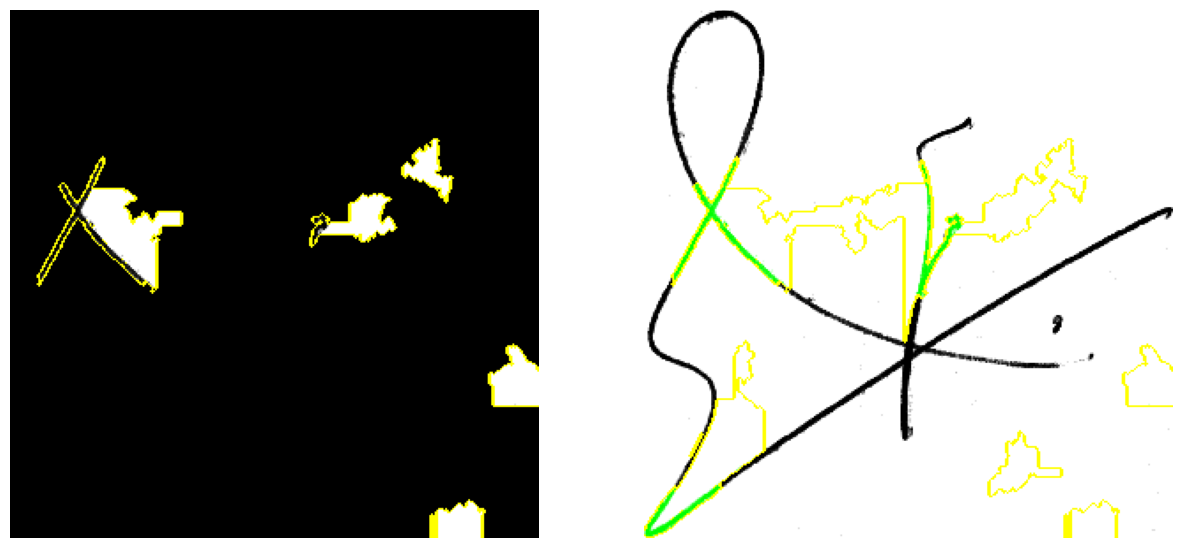

In [ ]:


explanation= explainer.explain_instance(image.astype('double'), model.predict,  top_labels=3, hide_color=0, num_samples=1000)

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

In [ ]:
image1 = next(lime_generator)
image1

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dtype=float32)

In [ ]:
image1.shape

(1, 299, 299, 3)

In [ ]:
image1 = np.reshape(image1,(299,299,3))

In [ ]:
image1.shape

(299, 299, 3)

In [ ]:
image1

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 32ms/step


(-0.5, 298.5, 298.5, -0.5)

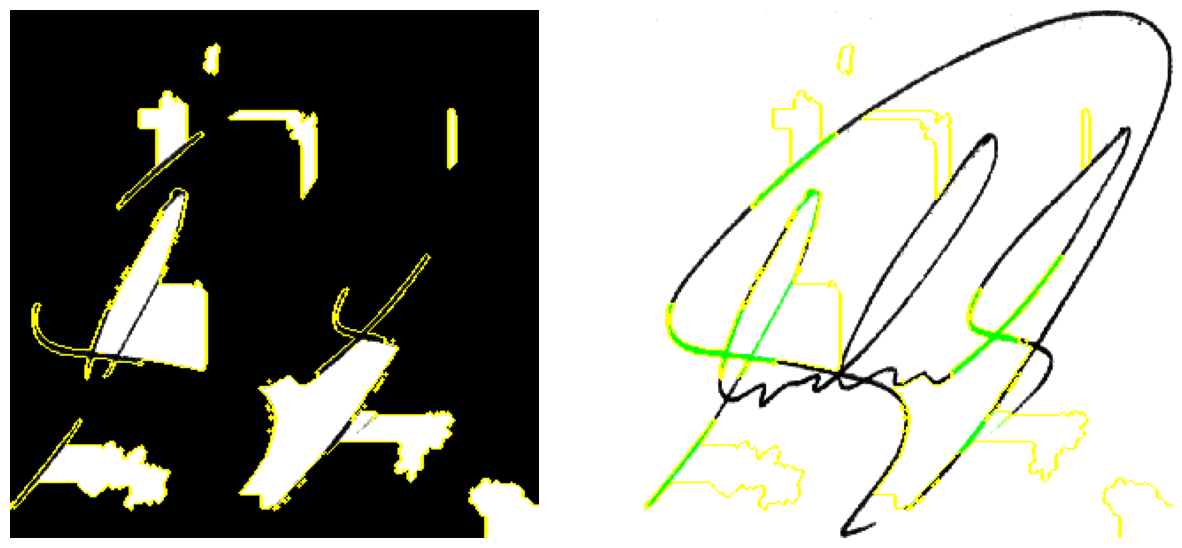

In [ ]:


explanation= explainer.explain_instance(image1.astype('double'), model.predict,  top_labels=115, hide_color=0, num_samples=1000)

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')